In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import os
import freud
from tqdm.auto import tqdm
# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
#for root, dirs, files in os.walk("../data/gfield2"):
for root, dirs, files in os.walk("../data/ganneal"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
print(len(simlist))
#assert len(simlist) == len(datafiles) == len(csvfiles)


def load_csv(fname,verbose=True):
    if verbose:
        with open(fname) as f:
            print(f.readline().strip('\n'))
    return np.loadtxt(fname,skiprows=1,delimiter=",")

def plot_energy(fpath,csv1,save=False):
    fig,ax1 = plt.subplots()
    ax1.set_title(fpath.split("/")[-2])
    ax1.plot(csv1[10:,0],csv1[10:,1],label="TotalEnergy")
    ax1.set_xlabel("timesteps")
    ax1.set_ylabel("Total Energy")
    ax1.tick_params(axis ='y', labelcolor="tab:blue")
    #ax2  = ax1.twinx()
    #ax2.plot(csv1[:,0],csv1[:,2],label="Eexcess",color="tab:orange")
    #ax2.set_ylabel("Ent. Excess")
    #ax2.tick_params(axis ='y', labelcolor = "tab:orange")
    #plt.show()
    if save:
        fname = fpath[:-4]+"_energy.png"
        print(fname)
        fig.savefig(fname)
        
%matplotlib ipympl

550


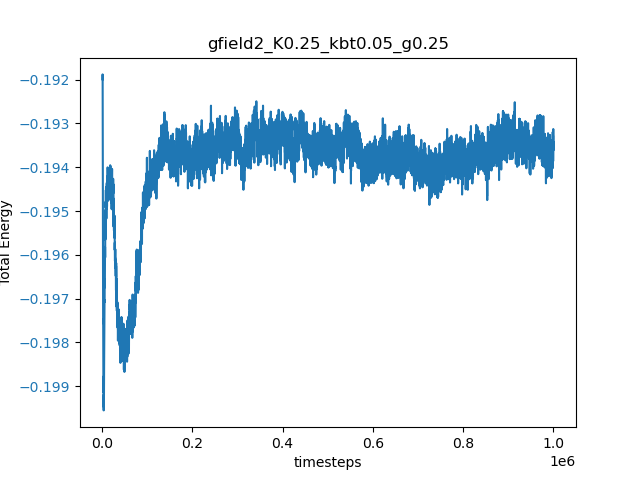

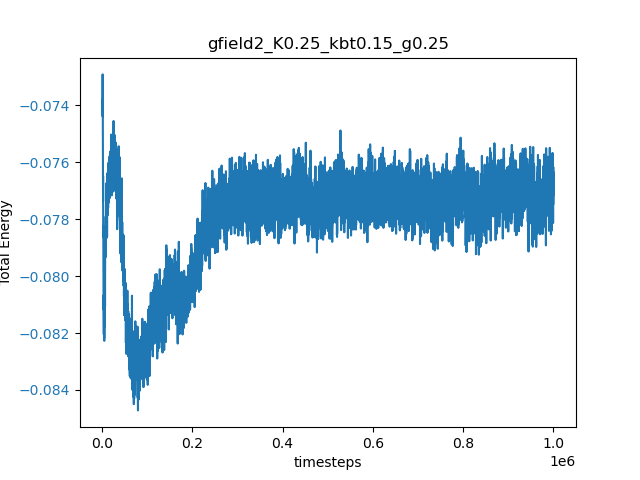

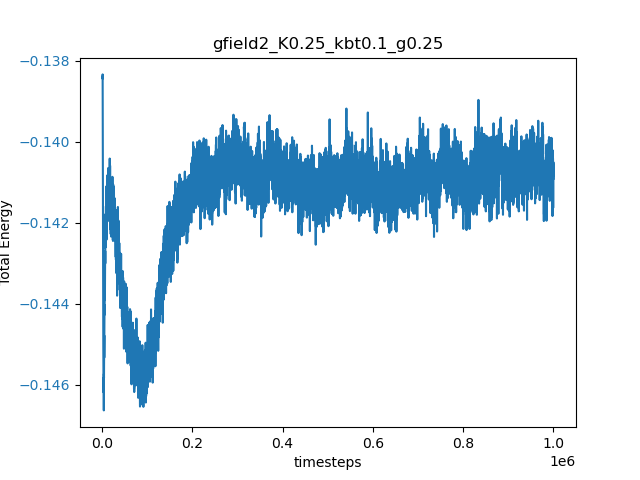

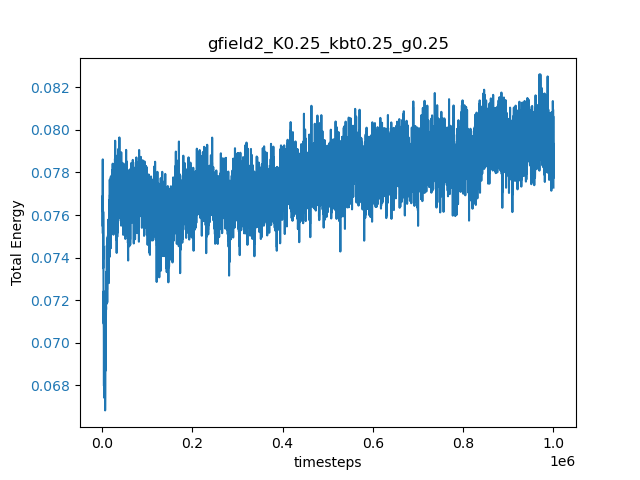

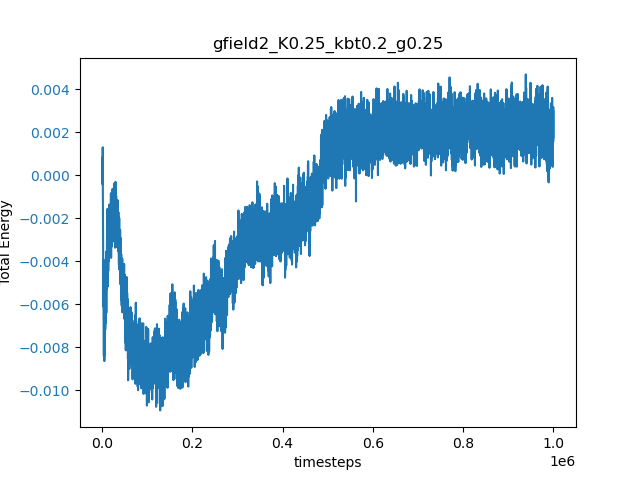

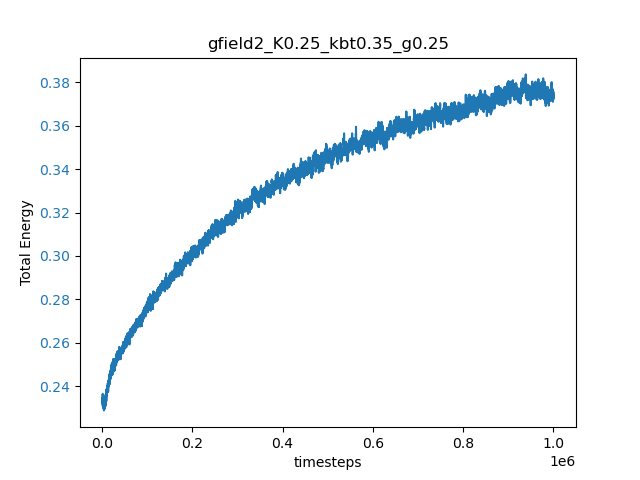

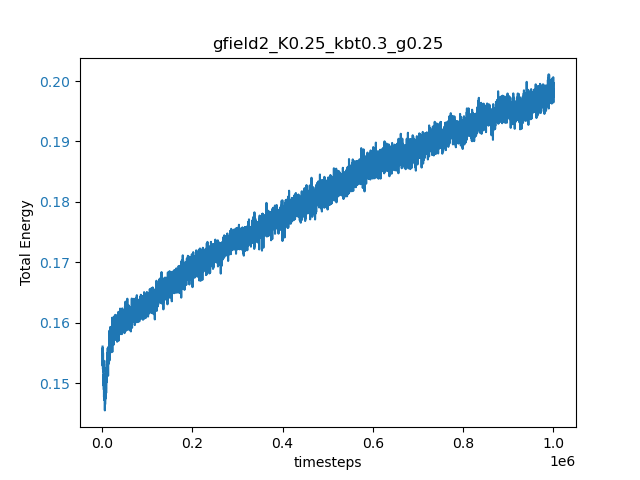

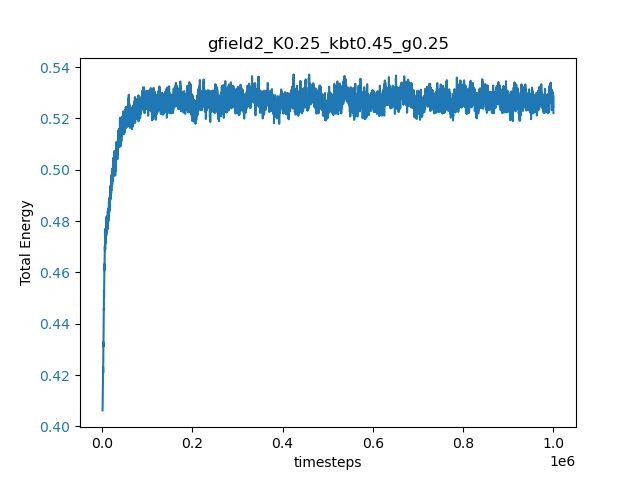

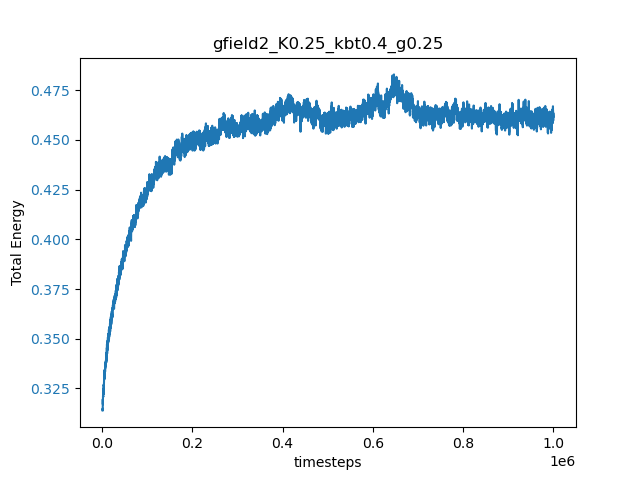

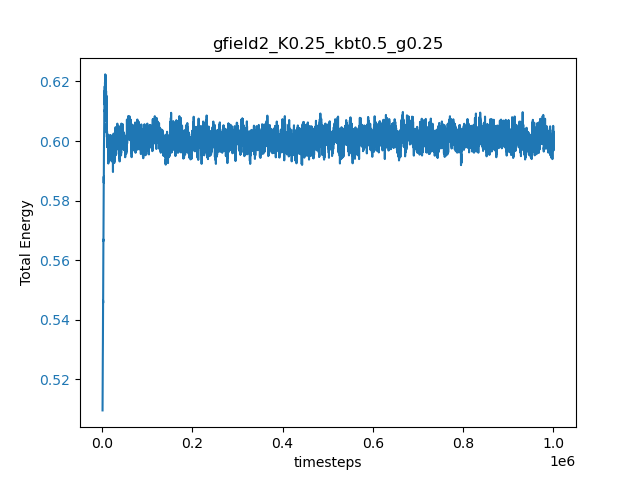

In [3]:
for csvfile in csvfiles:
    csvdata = load_csv(csvfile,verbose=False)
    # K = float(csvfile.split("/")[3].split("_")[-2][1:])
    K = float(csvfile.split("/")[3].split("_")[-3][1:]) # gfield
    g = float(csvfile.split("/")[3].split("_")[-1][1:])
    if K == 0.25 and g == 0.25:
        plot_energy(csvfile,csvdata,save=False)

In [3]:
from IPython.display import Image
Image(filename='../data/gfieldlarge/gfieldlarge_K1.0_kbt0.3_g0.0/gfield2_K1.0_kbt0.3_g0.0.png')

FileNotFoundError: [Errno 2] No such file or directory: '../data/gfieldlarge/gfieldlarge_K1.0_kbt0.3_g0.0/gfield2_K1.0_kbt0.3_g0.0.png'

Gfield:	 0.0


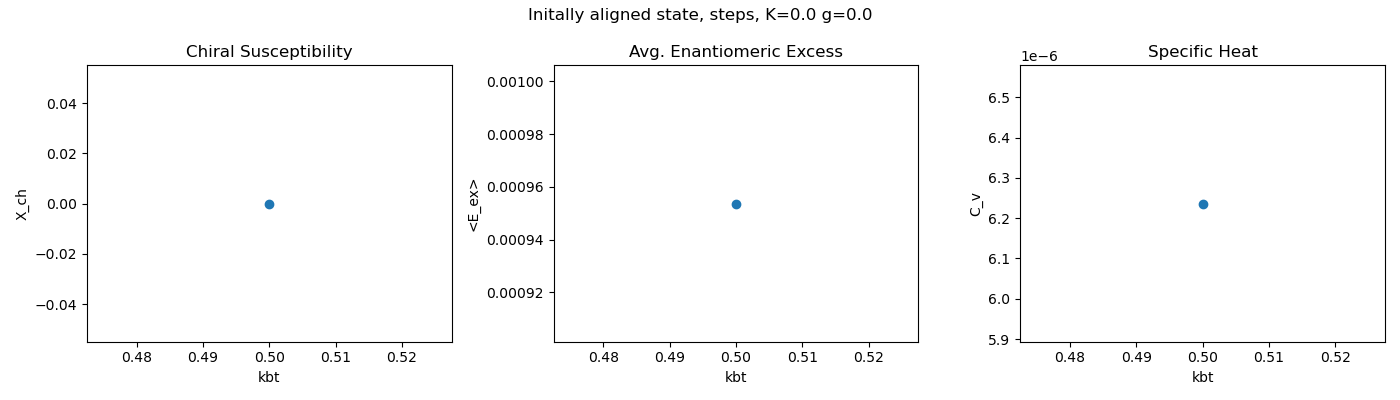

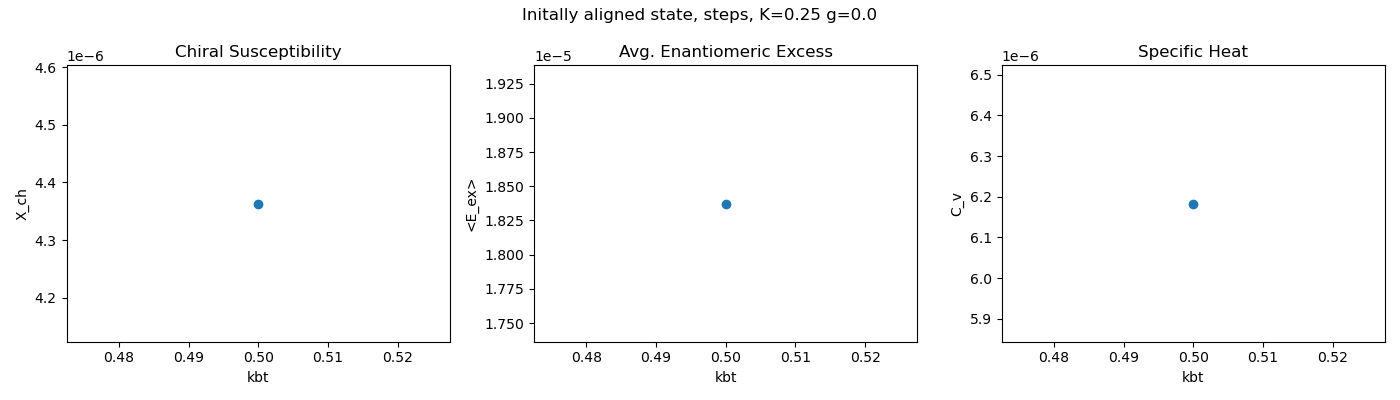

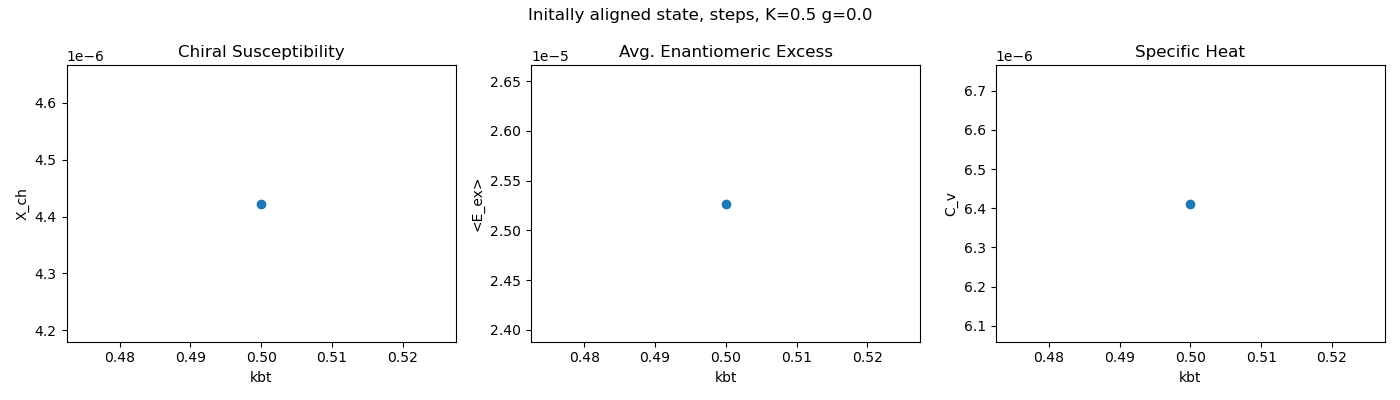

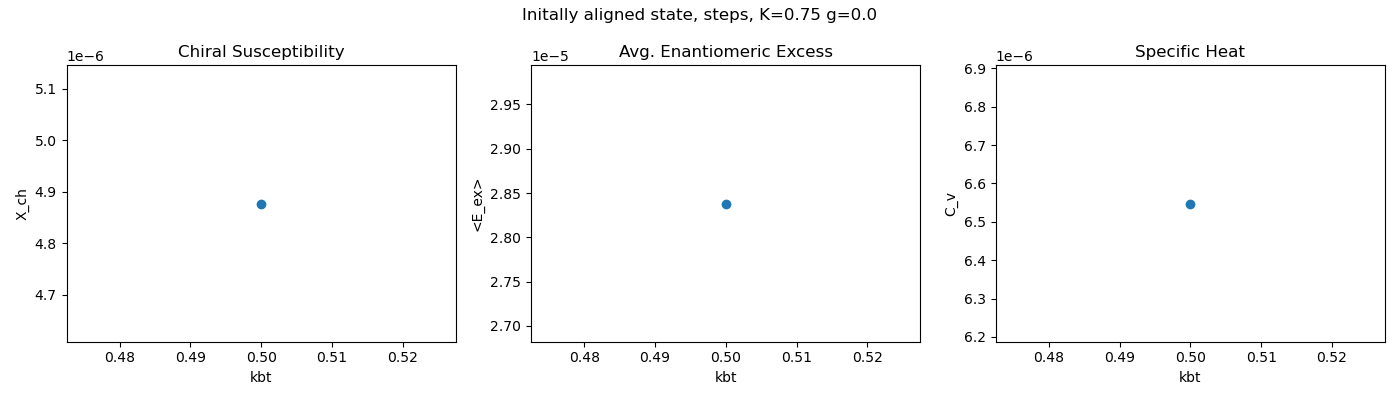

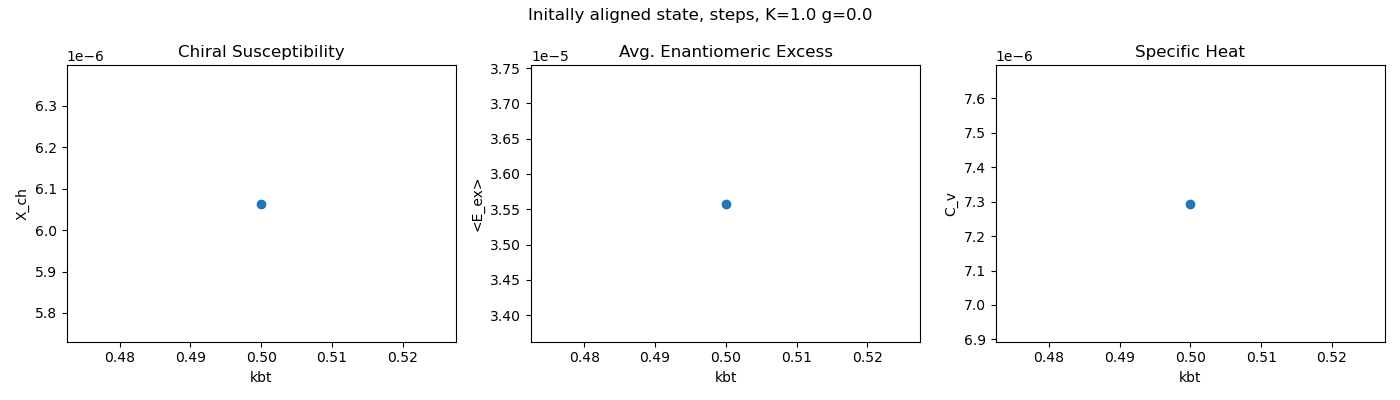

Gfield:	 0.05


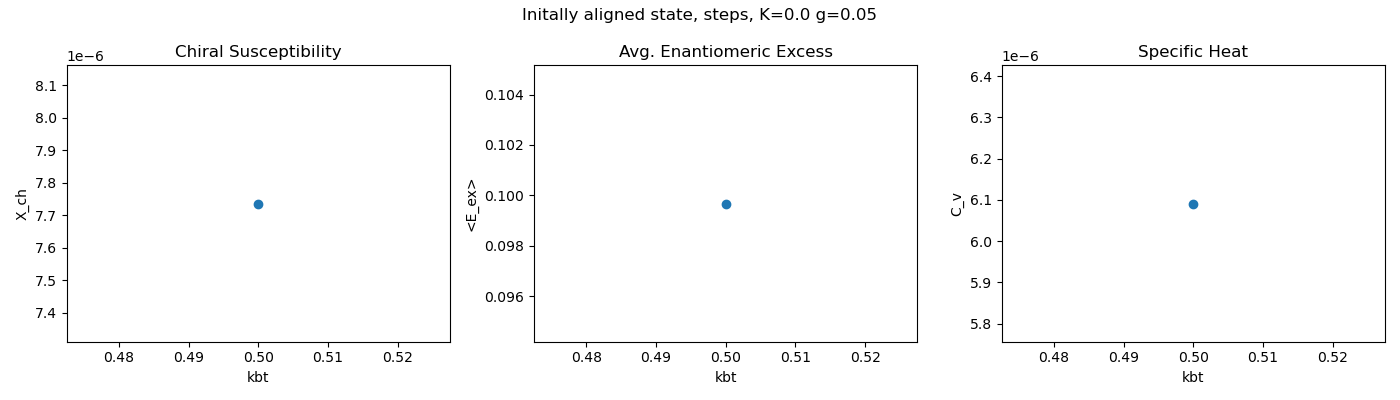

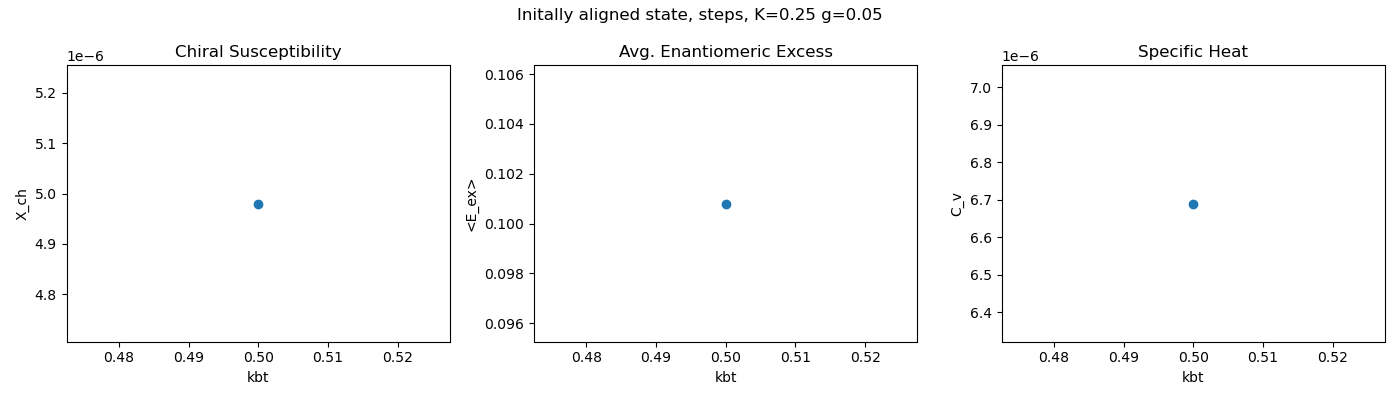

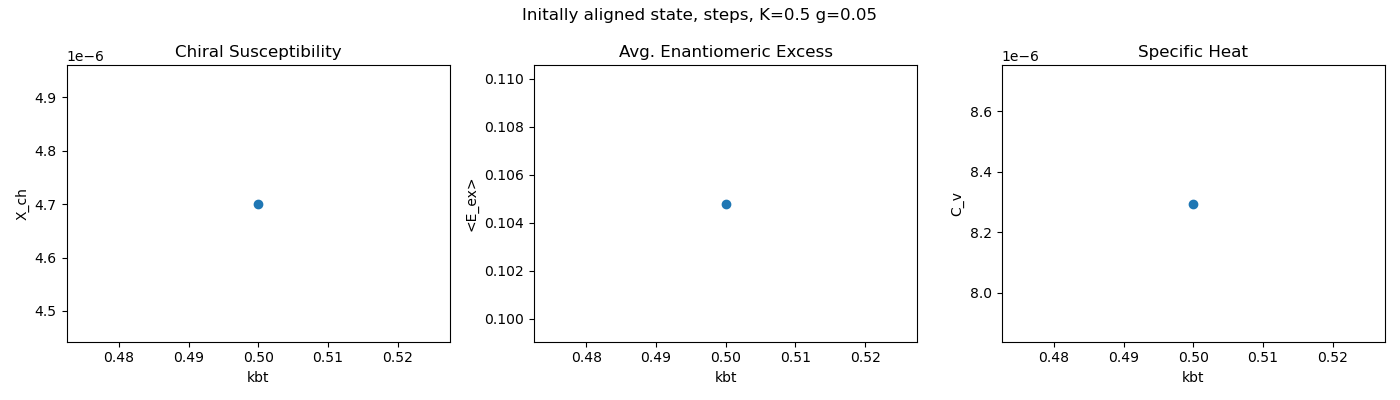

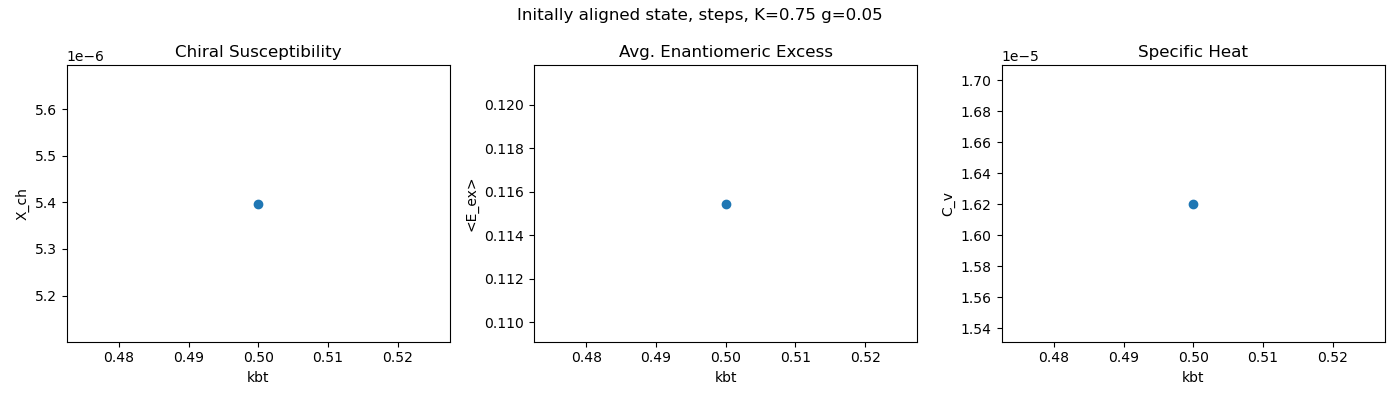

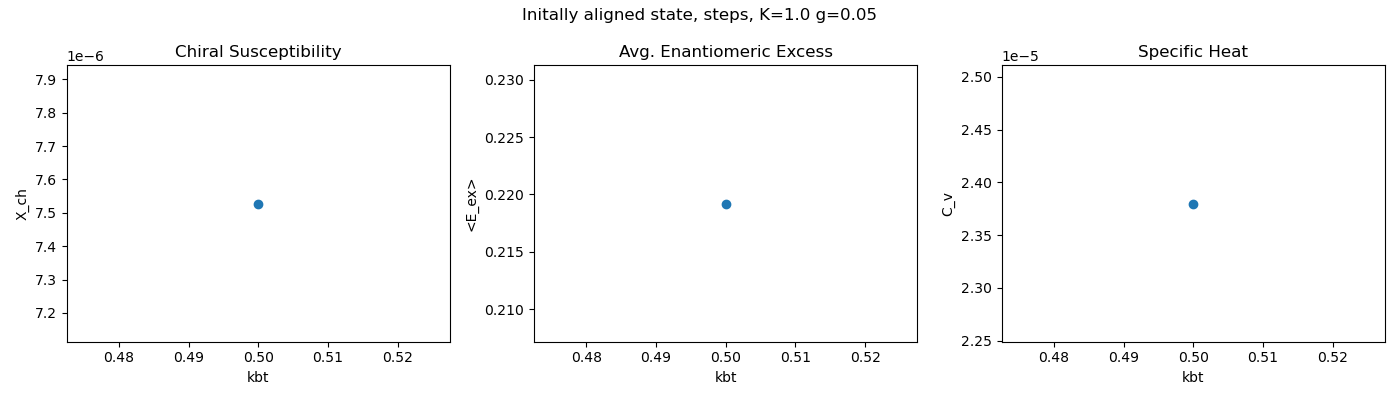

Gfield:	 0.1


KeyboardInterrupt: 

In [4]:
# measuring chiral susceptibility mean(enantionmeric excess^2) - mean(enantiomeric excess^2)
def measure_chi(Kin,gin,init_type="ganneal"):
    ch_sus = []
    kbts = []
    avg_ent = []
    c_v = []
    for csvfile in csvfiles:
        csv1 = load_csv(csvfile,verbose=False)
        K = float(csvfile.split("/")[3].split("_")[-3][1:])
        g = float(csvfile.split("/")[3].split("_")[-1][1:])
        kbt = float(csvfile.split("/")[3].split("_")[-2][3:])
        if K == Kin and g == gin and kbt == 0.5 and init_type in csvfile:
            #print(K,g,kbt,csvfile)
            kbts.append(kbt)
            # chiral susceptibility
            excess = csv1[7500:,2]
            ch_sus.append(np.mean(excess**2) - np.mean(excess)**2)
            # average enantiomeric excess
            avg_ent.append(np.abs(np.mean(excess)))
            #specific heat
            E = csv1[7500:,1]
            c_v.append((np.mean(E**2) - np.mean(E)**2)/kbt)

    #note the lists are not sorted, so the plots look weird, sorting here
    zipped = list(zip(kbts,ch_sus,avg_ent,c_v))
    zipped.sort()
    kbts,ch_sus,avg_ent,c_v = zip(*zipped)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
    fig.suptitle("Initally aligned state, steps, K="+str(Kin)+" g="+str(gin))
    ax1.set_title("Chiral Susceptibility")
    ax1.set_ylabel("X_ch")
    ax1.set_xlabel("kbt")
    ax1.scatter(kbts,ch_sus)
    ax1.plot(kbts,ch_sus,linestyle='dashed')
    #print(kbts,ch_sus,sep="\n")
    
    ax2.set_title("Avg. Enantiomeric Excess")
    ax2.set_ylabel("<E_ex>")
    ax2.set_xlabel("kbt")
    ax2.scatter(kbts,avg_ent)
    ax2.plot(kbts,avg_ent,linestyle='dashed')
    
    ax3.set_title("Specific Heat")
    ax3.set_ylabel("C_v")
    ax3.set_xlabel("kbt")
    ax3.scatter(kbts,c_v)
    ax3.plot(kbts,c_v,linestyle='dashed')
    fig.tight_layout()
    plt.show()
    
for Gplot in np.arange(0.0,0.251,0.05):
    print("Gfield:\t",Gplot)
    for Kplot in np.arange(0.0,1.1,0.25):
        measure_chi(Kplot,np.around(Gplot,2))

  0%|          | 0/10 [00:00<?, ?it/s]

0.0 0.0 0.05 0.0
0.0 0.05 0.05 1.0
0.0 0.1 0.05 2.0
0.0 0.15 0.05 2.9999999999999996
0.0 0.2 0.05 4.0
0.0 0.25 0.05 5.0
0.25 0.0 0.05 0.0
0.25 0.05 0.05 1.0
0.25 0.1 0.05 2.0
0.25 0.15 0.05 2.9999999999999996
0.25 0.2 0.05 4.0
0.25 0.25 0.05 5.0
0.5 0.0 0.05 0.0
0.5 0.05 0.05 1.0
0.5 0.1 0.05 2.0
0.5 0.15 0.05 2.9999999999999996
0.5 0.2 0.05 4.0
0.5 0.25 0.05 5.0
0.75 0.0 0.05 0.0
0.75 0.05 0.05 1.0
0.75 0.1 0.05 2.0
0.75 0.15 0.05 2.9999999999999996
0.75 0.2 0.05 4.0
0.75 0.25 0.05 5.0
1.0 0.0 0.05 0.0
1.0 0.05 0.05 1.0
1.0 0.1 0.05 2.0
1.0 0.15 0.05 2.9999999999999996
1.0 0.2 0.05 4.0
1.0 0.25 0.05 5.0


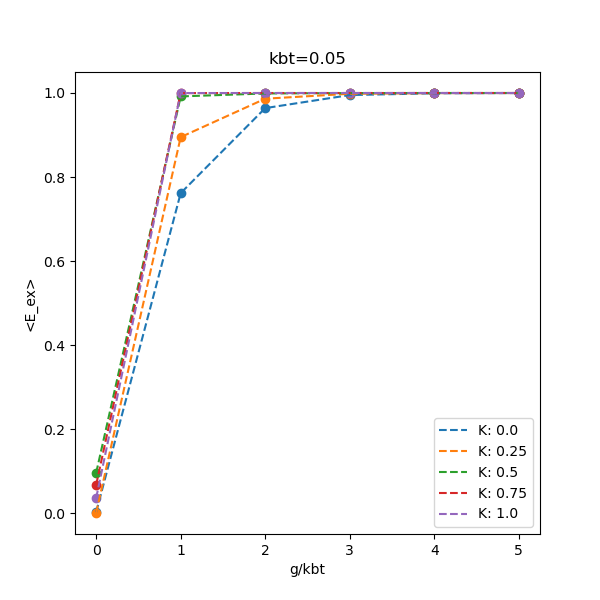

0.0 0.0 0.1 0.0
0.0 0.05 0.1 0.5
0.0 0.1 0.1 1.0
0.0 0.15 0.1 1.4999999999999998
0.0 0.2 0.1 2.0
0.0 0.25 0.1 2.5
0.25 0.0 0.1 0.0
0.25 0.05 0.1 0.5
0.25 0.1 0.1 1.0
0.25 0.15 0.1 1.4999999999999998
0.25 0.2 0.1 2.0
0.25 0.25 0.1 2.5
0.5 0.0 0.1 0.0
0.5 0.05 0.1 0.5
0.5 0.1 0.1 1.0
0.5 0.15 0.1 1.4999999999999998
0.5 0.2 0.1 2.0
0.5 0.25 0.1 2.5
0.75 0.0 0.1 0.0
0.75 0.05 0.1 0.5
0.75 0.1 0.1 1.0
0.75 0.15 0.1 1.4999999999999998
0.75 0.2 0.1 2.0
0.75 0.25 0.1 2.5
1.0 0.0 0.1 0.0
1.0 0.05 0.1 0.5
1.0 0.1 0.1 1.0
1.0 0.15 0.1 1.4999999999999998
1.0 0.2 0.1 2.0
1.0 0.25 0.1 2.5


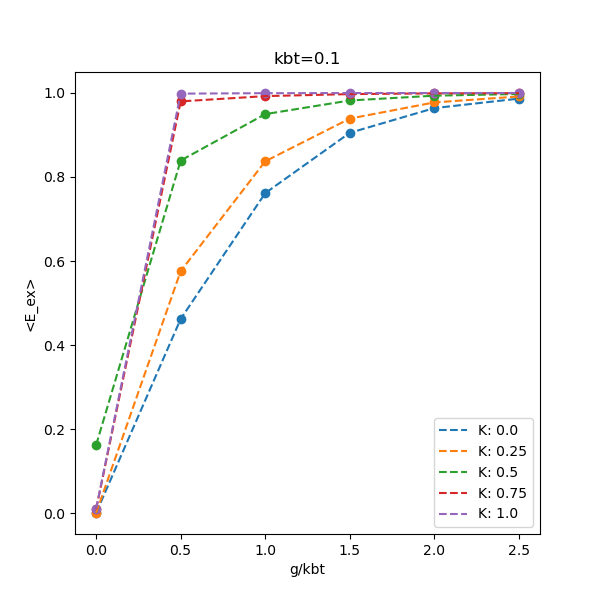

0.0 0.0 0.15 0.0
0.0 0.05 0.15 0.33333333333333337
0.0 0.1 0.15 0.6666666666666667
0.0 0.15 0.15 1.0
0.0 0.2 0.15 1.3333333333333335
0.0 0.25 0.15 1.6666666666666667
0.25 0.0 0.15 0.0
0.25 0.05 0.15 0.33333333333333337
0.25 0.1 0.15 0.6666666666666667
0.25 0.15 0.15 1.0
0.25 0.2 0.15 1.3333333333333335
0.25 0.25 0.15 1.6666666666666667
0.5 0.0 0.15 0.0
0.5 0.05 0.15 0.33333333333333337
0.5 0.1 0.15 0.6666666666666667
0.5 0.15 0.15 1.0
0.5 0.2 0.15 1.3333333333333335
0.5 0.25 0.15 1.6666666666666667
0.75 0.0 0.15 0.0
0.75 0.05 0.15 0.33333333333333337
0.75 0.1 0.15 0.6666666666666667
0.75 0.15 0.15 1.0
0.75 0.2 0.15 1.3333333333333335
0.75 0.25 0.15 1.6666666666666667
1.0 0.0 0.15 0.0
1.0 0.05 0.15 0.33333333333333337
1.0 0.1 0.15 0.6666666666666667
1.0 0.15 0.15 1.0
1.0 0.2 0.15 1.3333333333333335
1.0 0.25 0.15 1.6666666666666667


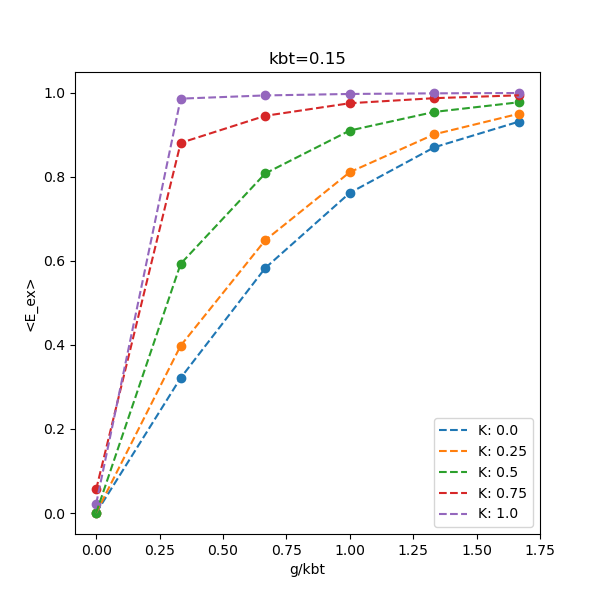

0.0 0.0 0.2 0.0
0.0 0.05 0.2 0.25
0.0 0.1 0.2 0.5
0.0 0.15 0.2 0.7499999999999999
0.0 0.2 0.2 1.0
0.0 0.25 0.2 1.25
0.25 0.0 0.2 0.0
0.25 0.05 0.2 0.25
0.25 0.1 0.2 0.5
0.25 0.15 0.2 0.7499999999999999
0.25 0.2 0.2 1.0
0.25 0.25 0.2 1.25
0.5 0.0 0.2 0.0
0.5 0.05 0.2 0.25
0.5 0.1 0.2 0.5
0.5 0.15 0.2 0.7499999999999999
0.5 0.2 0.2 1.0
0.5 0.25 0.2 1.25
0.75 0.0 0.2 0.0
0.75 0.05 0.2 0.25
0.75 0.1 0.2 0.5
0.75 0.15 0.2 0.7499999999999999
0.75 0.2 0.2 1.0
0.75 0.25 0.2 1.25
1.0 0.0 0.2 0.0
1.0 0.05 0.2 0.25
1.0 0.1 0.2 0.5
1.0 0.15 0.2 0.7499999999999999
1.0 0.2 0.2 1.0
1.0 0.25 0.2 1.25


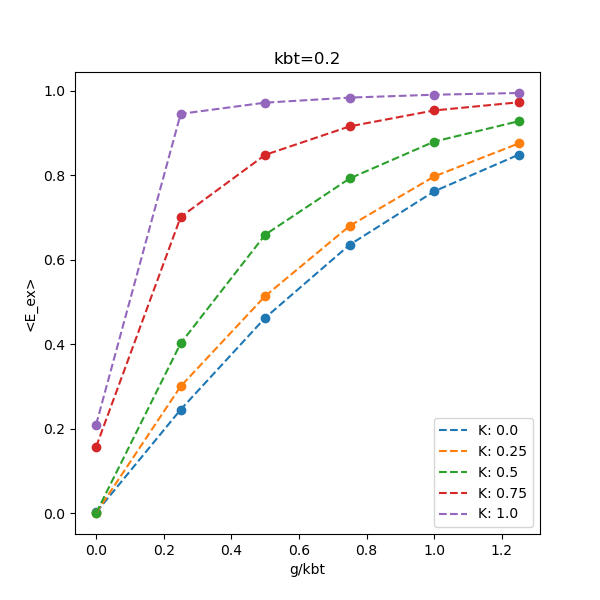

0.0 0.0 0.25 0.0
0.0 0.05 0.25 0.2
0.0 0.1 0.25 0.4
0.0 0.15 0.25 0.6
0.0 0.2 0.25 0.8
0.0 0.25 0.25 1.0
0.25 0.0 0.25 0.0
0.25 0.05 0.25 0.2
0.25 0.1 0.25 0.4
0.25 0.15 0.25 0.6
0.25 0.2 0.25 0.8
0.25 0.25 0.25 1.0
0.5 0.0 0.25 0.0
0.5 0.05 0.25 0.2
0.5 0.1 0.25 0.4
0.5 0.15 0.25 0.6
0.5 0.2 0.25 0.8
0.5 0.25 0.25 1.0
0.75 0.0 0.25 0.0
0.75 0.05 0.25 0.2
0.75 0.1 0.25 0.4
0.75 0.15 0.25 0.6
0.75 0.2 0.25 0.8
0.75 0.25 0.25 1.0
1.0 0.0 0.25 0.0
1.0 0.05 0.25 0.2
1.0 0.1 0.25 0.4
1.0 0.15 0.25 0.6
1.0 0.2 0.25 0.8
1.0 0.25 0.25 1.0


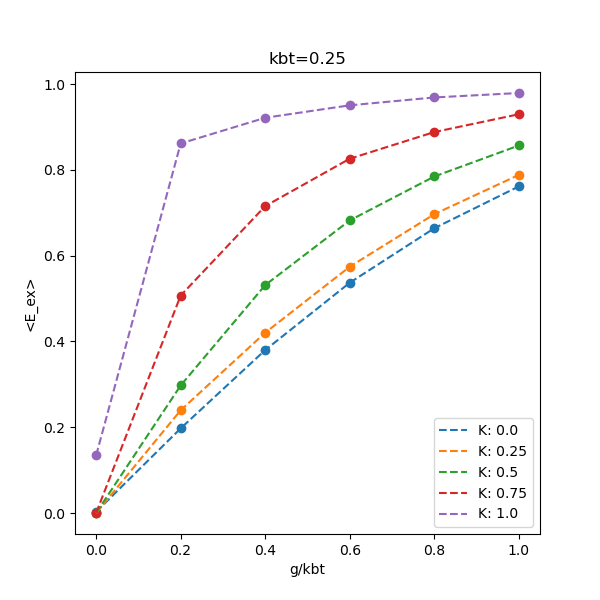

0.0 0.0 0.3 0.0
0.0 0.05 0.3 0.16666666666666669
0.0 0.1 0.3 0.33333333333333337
0.0 0.15 0.3 0.5
0.0 0.2 0.3 0.6666666666666667
0.0 0.25 0.3 0.8333333333333334
0.25 0.0 0.3 0.0
0.25 0.05 0.3 0.16666666666666669
0.25 0.1 0.3 0.33333333333333337
0.25 0.15 0.3 0.5
0.25 0.2 0.3 0.6666666666666667
0.25 0.25 0.3 0.8333333333333334
0.5 0.0 0.3 0.0
0.5 0.05 0.3 0.16666666666666669
0.5 0.1 0.3 0.33333333333333337
0.5 0.15 0.3 0.5
0.5 0.2 0.3 0.6666666666666667
0.5 0.25 0.3 0.8333333333333334
0.75 0.0 0.3 0.0
0.75 0.05 0.3 0.16666666666666669
0.75 0.1 0.3 0.33333333333333337
0.75 0.15 0.3 0.5
0.75 0.2 0.3 0.6666666666666667
0.75 0.25 0.3 0.8333333333333334
1.0 0.0 0.3 0.0
1.0 0.05 0.3 0.16666666666666669
1.0 0.1 0.3 0.33333333333333337
1.0 0.15 0.3 0.5
1.0 0.2 0.3 0.6666666666666667
1.0 0.25 0.3 0.8333333333333334


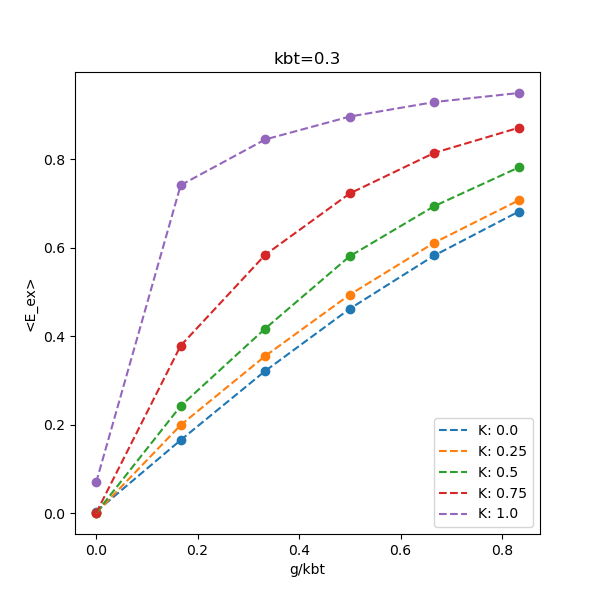

0.0 0.0 0.35 0.0
0.0 0.05 0.35 0.14285714285714288
0.0 0.1 0.35 0.28571428571428575
0.0 0.15 0.35 0.4285714285714286
0.0 0.2 0.35 0.5714285714285715
0.0 0.25 0.35 0.7142857142857143
0.25 0.0 0.35 0.0
0.25 0.05 0.35 0.14285714285714288
0.25 0.1 0.35 0.28571428571428575
0.25 0.15 0.35 0.4285714285714286
0.25 0.2 0.35 0.5714285714285715
0.25 0.25 0.35 0.7142857142857143
0.5 0.0 0.35 0.0
0.5 0.05 0.35 0.14285714285714288
0.5 0.1 0.35 0.28571428571428575
0.5 0.15 0.35 0.4285714285714286
0.5 0.2 0.35 0.5714285714285715
0.5 0.25 0.35 0.7142857142857143
0.75 0.0 0.35 0.0
0.75 0.05 0.35 0.14285714285714288
0.75 0.1 0.35 0.28571428571428575
0.75 0.15 0.35 0.4285714285714286
0.75 0.2 0.35 0.5714285714285715
0.75 0.25 0.35 0.7142857142857143
1.0 0.0 0.35 0.0
1.0 0.05 0.35 0.14285714285714288
1.0 0.1 0.35 0.28571428571428575
1.0 0.15 0.35 0.4285714285714286
1.0 0.2 0.35 0.5714285714285715
1.0 0.25 0.35 0.7142857142857143


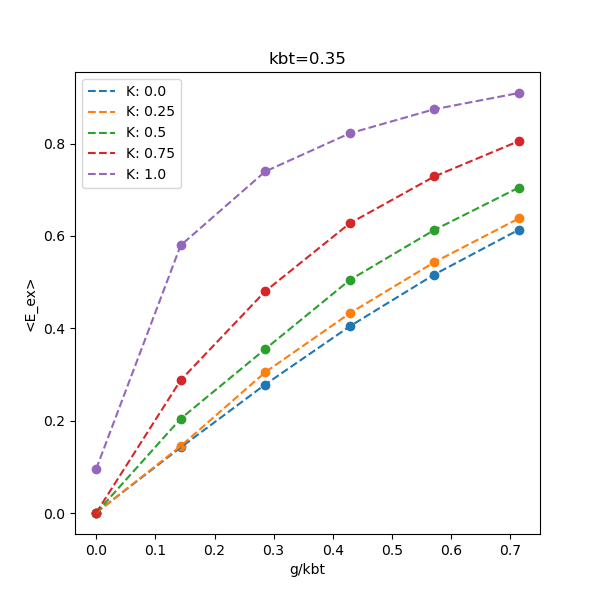

0.0 0.0 0.4 0.0
0.0 0.05 0.4 0.125
0.0 0.1 0.4 0.25
0.0 0.15 0.4 0.37499999999999994
0.0 0.2 0.4 0.5
0.0 0.25 0.4 0.625
0.25 0.0 0.4 0.0
0.25 0.05 0.4 0.125
0.25 0.1 0.4 0.25
0.25 0.15 0.4 0.37499999999999994
0.25 0.2 0.4 0.5
0.25 0.25 0.4 0.625
0.5 0.0 0.4 0.0
0.5 0.05 0.4 0.125
0.5 0.1 0.4 0.25
0.5 0.15 0.4 0.37499999999999994
0.5 0.2 0.4 0.5
0.5 0.25 0.4 0.625
0.75 0.0 0.4 0.0
0.75 0.05 0.4 0.125
0.75 0.1 0.4 0.25
0.75 0.15 0.4 0.37499999999999994
0.75 0.2 0.4 0.5
0.75 0.25 0.4 0.625
1.0 0.0 0.4 0.0
1.0 0.05 0.4 0.125
1.0 0.1 0.4 0.25
1.0 0.15 0.4 0.37499999999999994
1.0 0.2 0.4 0.5
1.0 0.25 0.4 0.625


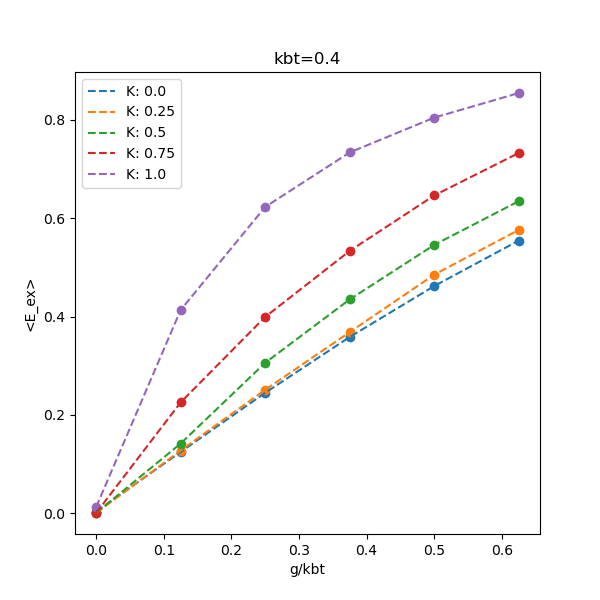

0.0 0.0 0.45 0.0
0.0 0.05 0.45 0.11111111111111112
0.0 0.1 0.45 0.22222222222222224
0.0 0.15 0.45 0.3333333333333333
0.0 0.2 0.45 0.4444444444444445
0.0 0.25 0.45 0.5555555555555556
0.25 0.0 0.45 0.0
0.25 0.05 0.45 0.11111111111111112
0.25 0.1 0.45 0.22222222222222224
0.25 0.15 0.45 0.3333333333333333
0.25 0.2 0.45 0.4444444444444445
0.25 0.25 0.45 0.5555555555555556
0.5 0.0 0.45 0.0
0.5 0.05 0.45 0.11111111111111112
0.5 0.1 0.45 0.22222222222222224
0.5 0.15 0.45 0.3333333333333333
0.5 0.2 0.45 0.4444444444444445
0.5 0.25 0.45 0.5555555555555556
0.75 0.0 0.45 0.0
0.75 0.05 0.45 0.11111111111111112
0.75 0.1 0.45 0.22222222222222224
0.75 0.15 0.45 0.3333333333333333
0.75 0.2 0.45 0.4444444444444445
0.75 0.25 0.45 0.5555555555555556
1.0 0.0 0.45 0.0
1.0 0.05 0.45 0.11111111111111112
1.0 0.1 0.45 0.22222222222222224
1.0 0.15 0.45 0.3333333333333333
1.0 0.2 0.45 0.4444444444444445
1.0 0.25 0.45 0.5555555555555556


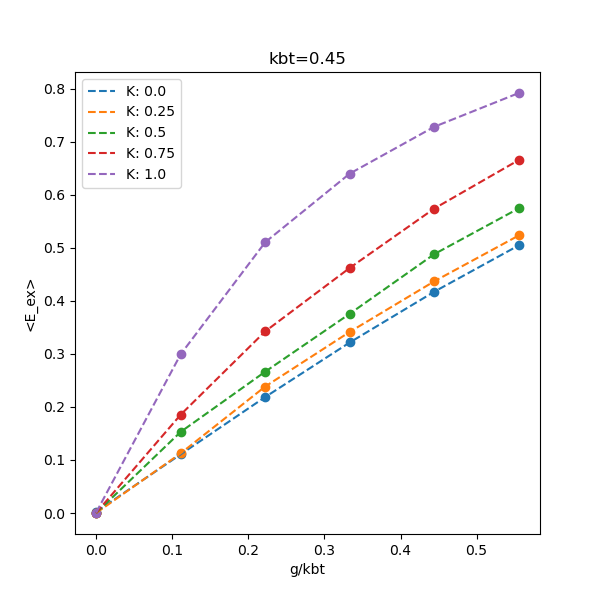

0.0 0.0 0.5 0.0
0.0 0.05 0.5 0.1
0.0 0.1 0.5 0.2
0.0 0.15 0.5 0.3
0.0 0.2 0.5 0.4
0.0 0.25 0.5 0.5
0.25 0.0 0.5 0.0
0.25 0.05 0.5 0.1
0.25 0.1 0.5 0.2
0.25 0.15 0.5 0.3
0.25 0.2 0.5 0.4
0.25 0.25 0.5 0.5
0.5 0.0 0.5 0.0
0.5 0.05 0.5 0.1
0.5 0.1 0.5 0.2
0.5 0.15 0.5 0.3
0.5 0.2 0.5 0.4
0.5 0.25 0.5 0.5
0.75 0.0 0.5 0.0
0.75 0.05 0.5 0.1
0.75 0.1 0.5 0.2
0.75 0.15 0.5 0.3
0.75 0.2 0.5 0.4
0.75 0.25 0.5 0.5
1.0 0.0 0.5 0.0
1.0 0.05 0.5 0.1
1.0 0.1 0.5 0.2
1.0 0.15 0.5 0.3
1.0 0.2 0.5 0.4
1.0 0.25 0.5 0.5


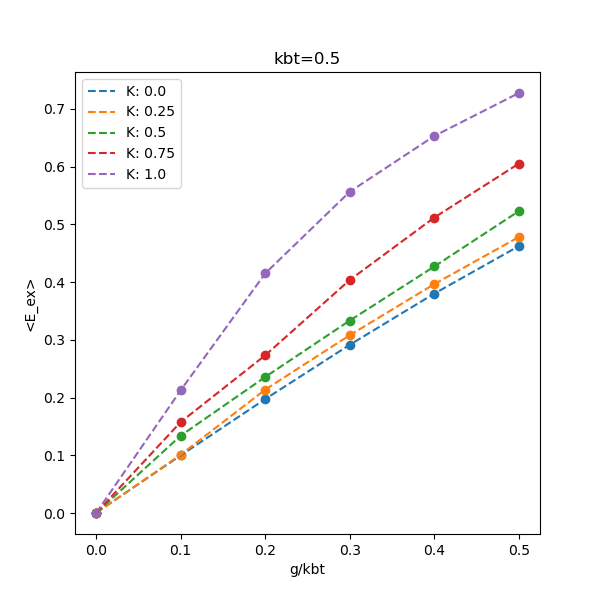

In [66]:
def g_plot(Tplot):
    Tplot = np.around(Tplot,2)
    init_type="gfield2"
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    for Kplot in np.arange(0.0,1.1,0.25):
        X,Y = [],[]
        for gPlot in np.arange(0.0,0.251,0.05):
            for csvfile in csvfiles:
                csv1 = load_csv(csvfile,verbose=False)
                K = float(csvfile.split("/")[3].split("_")[-3][1:])
                kbt = float(csvfile.split("/")[3].split("_")[-2][3:])
                g = float(csvfile.split("/")[3].split("_")[-1][1:])
                #print("G ",g,gPlot)
                if K == Kplot and kbt == Tplot and g == np.around(gPlot,2) and init_type in csvfile:
                    #print(K,g,kbt,g/kbt)
                    X.append(g/kbt)
                    Y.append(np.abs(np.mean(csv1[7500:,2])))
        zipped = list(zip(X,Y))
        zipped.sort()
        X,Y = zip(*zipped)
        ax.scatter(X,Y)
        ax.set_title("kbt="+str(Tplot))
        ax.plot(X,Y,linestyle='dashed',label="K: "+str(np.around(Kplot,2)))
        ax.set_ylabel("<E_ex>")
        ax.set_xlabel("g/kbt")
    plt.legend()
    plt.show()

for T in tqdm(np.arange(0.05,0.51,0.05)):
    g_plot(T)

  0%|          | 0/5 [00:00<?, ?it/s]

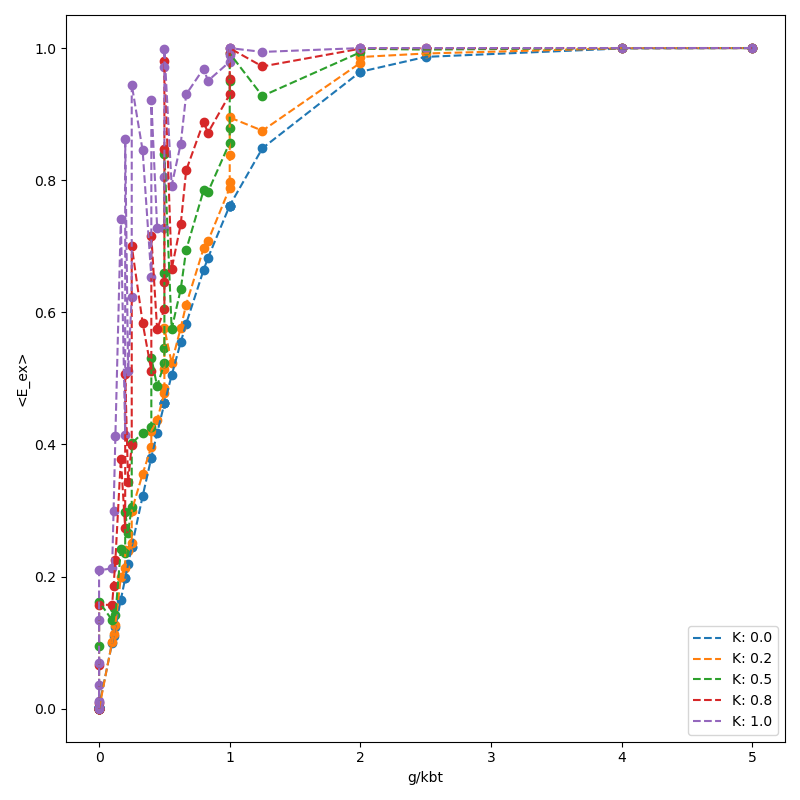

In [50]:
import pandas as pd
# plot the enantiomeric excess as a function of g/kbt for multipe K
# 1. fix multiple values of g/kbt
# 2. do same, but plot 
init_type="gfield2"
fig,ax = plt.subplots(1,1,figsize=(8,8))
for Kplot in tqdm(np.arange(0.0,1.1,0.25)):
    X = []
    Y = []
    for Tplot in np.arange(0.05,0.51,0.05):
        for gPlot in np.arange(0.0,0.251,0.05):
            for csvfile in csvfiles:
                csv1 = load_csv(csvfile,verbose=False)
                K = float(csvfile.split("/")[3].split("_")[-3][1:])
                kbt = float(csvfile.split("/")[3].split("_")[-2][3:])
                g = float(csvfile.split("/")[3].split("_")[-1][1:])
                if K == Kplot and kbt == Tplot and g == gPlot and init_type in csvfile:
                    #print(g,kbt,g/kbt)
                    X.append(g/kbt)
                    Y.append(np.abs(np.mean(csv1[7500:,2])))
    zipped = list(zip(X,Y))
    zipped.sort()
    X,Y = zip(*zipped)
    ax.scatter(X,Y)
    ax.plot(X,Y,linestyle='dashed',label="K: "+str(np.around(Kplot,1)))
    ax.set_ylabel("<E_ex>")
    ax.set_xlabel("g/kbt")
                    
fig.tight_layout()
plt.legend()
plt.show()

300
../data/gfield2/gfield2_K0.75_kbt0.25_g0.1/gfield2_K0.75_kbt0.25_g0.1_data.npz


[]

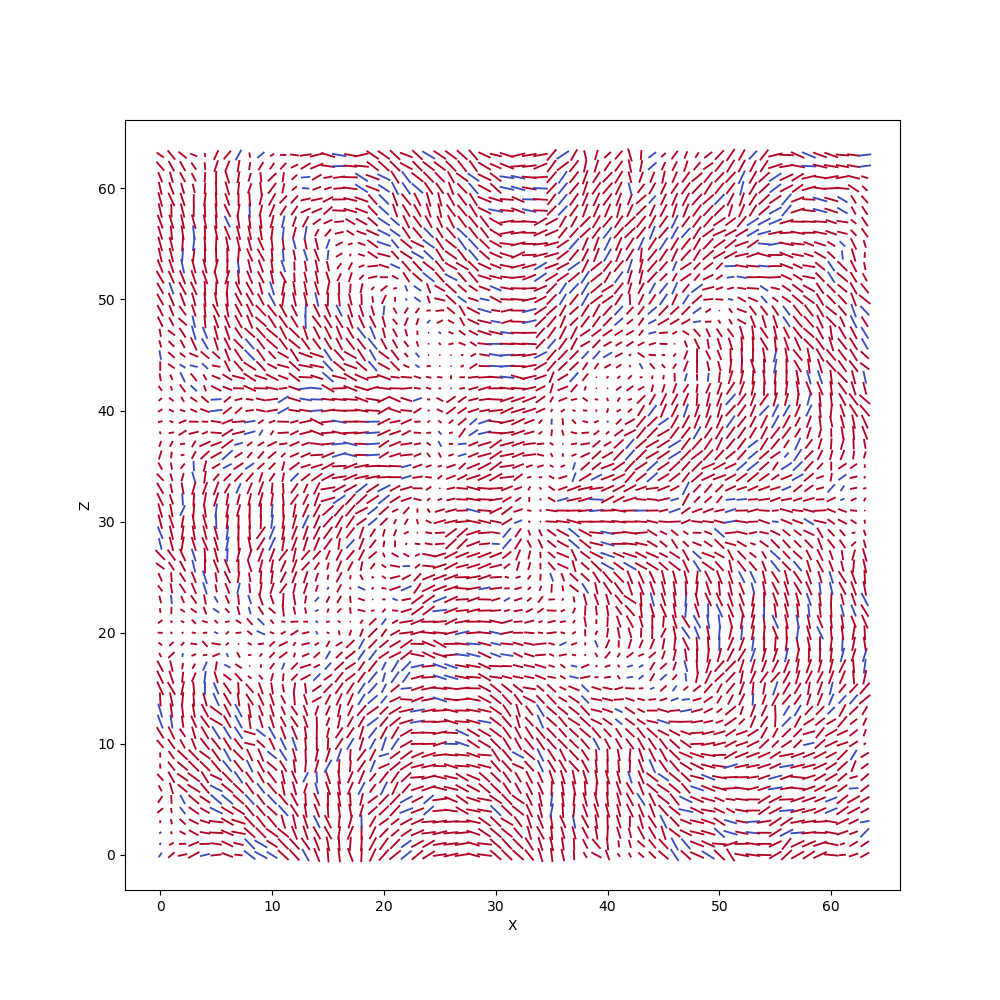

In [20]:
print(len(datafiles))
datafile = datafiles[200] #242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape
X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
mp = int(np.floor(nj/2))
u = data['nx'][:,mp,:]
v = data['ny'][:,mp,:]
w = data['nz'][:,mp,:]
s_color = data['s'][:,mp,:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.plot()

  0%|          | 0/5 [00:00<?, ?it/s]

NameError: name 'default_fontsize' is not defined

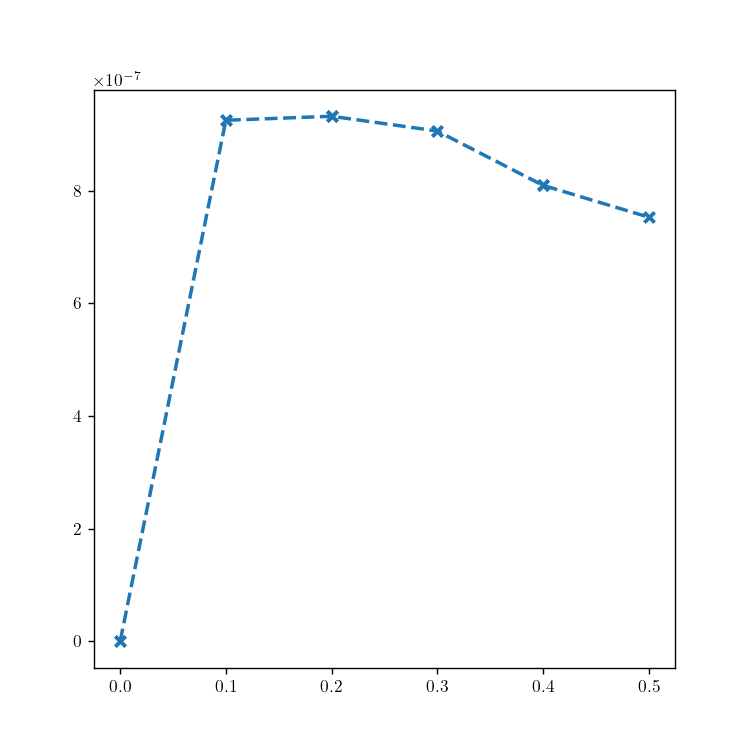

In [2]:
# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
for root, dirs, files in os.walk("../data/gfieldlarge2"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
assert len(simlist) == len(datafiles) == len(csvfiles)
plt.rcParams['text.usetex'] = True

Jinverse = (2.0/3.0)
def g_plot(Tplot):
    Tplot = np.around(Tplot,2)
    init_type="gfieldlarge"
    fig,ax = plt.subplots(1,1,figsize=(6,6),dpi=125)
    for Kplot in tqdm(np.arange(0.0,1.1,0.25)):
    #for Kplot in tqdm(np.arange(0.0,0.1,0.25)):
        X,Y = [],[]
        for gPlot in np.arange(0.0,0.251,0.0025):
            for csvfile in csvfiles:
                csv1 = load_csv(csvfile,verbose=False)
                K = float(csvfile.split("/")[3].split("_")[-3][1:])
                #KoJ = K*Jinverse
                kbt = float(csvfile.split("/")[3].split("_")[-2][3:])
                g = float(csvfile.split("/")[3].split("_")[-1][1:])
                #print("G ",g,gPlot,K,kbt,csvfile)
                if K == Kplot and kbt == Tplot and g == np.around(gPlot,2) and init_type in csvfile:
                    #print(K,g,kbt,g/kbt)
                    X.append(g/kbt)
                    excess = csv1[7500:,2]
                    ch_sus = (np.mean(excess**2) - np.mean(excess)**2)
                    Y.append(ch_sus)
        zipped = list(zip(X,Y))
        zipped.sort()
        X,Y = zip(*zipped)
        np.savetxt("ent_ex_K"+str(np.around(Kplot*Jinverse,3))+"_kbt"+str(Tplot)+".csv",np.vstack((X,Y)).T,delimiter=',',header='K/J='+str(np.around(Kplot*Jinverse,3))+' kBT='+str(Tplot)+'\ng/kbt,<Ent.Ex.>')
        #ax.scatter(X,Y,marker='x',linewidth=2,zorder=2)
        #ax.set_title("kbt="+str(Tplot))
        ax.plot(X,Y,marker='x',markeredgewidth=2,linewidth=2,linestyle='dashed',label=r"\textbf{$K/J$}: "+str(np.around(Kplot*Jinverse,3)),zorder=2)
        #ax.plot(X,Y,marker='x',linewidth=2,linestyle='dashed',label=str(np.around(Kplot*Jinverse,3)),zorder=2)
        ax.set_ylabel(r'\textbf{ $\eta$}',fontsize=default_fontsize)
        ax.set_xlabel(r'\textbf{$g/k_B T$}',fontsize=default_fontsize)

    ax.plot(X,np.tanh(X),linewidth=2,linestyle='solid',label=r"$tanh(\frac{g}{k_B T})$",color='k',zorder=1)
    plt.xticks(fontsize=default_fontsize)
    plt.yticks(fontsize=default_fontsize)
    plt.legend(fontsize=default_fontsize-6,loc="upper left")
    fig.tight_layout()
    plt.show()

g_plot(0.5)